In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Crime Data

In [39]:
data = pd.read_excel("/Users/wushuangyan/Projects/table-1.xls", 
                     header = 3)
data.head()

,Year,Population1,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Rape\n(revised \ndefinition)3,Rape\n(revised \ndefinition) \nrate3,Rape\n(legacy \ndefinition)4,Rape\n(legacy \ndefinition) \nrate4,...,Property \ncrime,Property \ncrime \nrate,Burglary,Burglary \nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor \nvehicle \ntheft,Motor \nvehicle \ntheft \nrate,Unnamed: 22,Unnamed: 23
0,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,10951827,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9,NaN,NaN
1,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,10208334,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5,,NaN
2,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,10182584,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2,NaN,NaN
3,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,10437189,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5,NaN,NaN
4,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,10455277,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9,NaN,NaN


## Data Pre-processing

In [17]:
crime = data.iloc[0:20,0:22]
crime['Year'] = crime['Year'].replace(['20015'],'2001')
crime['Year'] = crime['Year'].replace(['20166'],'2016')

crime.columns = ["Year", "Population", "VC", "VCR", "MNM", "MNMR" , "RP_RD" , "RR_RD",
               "RP_LD", "RR_LD", "RB", "RBR", "AA", "AAR", "PC", "PCR", "BG", "BGR",
               "LT", "LTR", "MVT", "MVTR"]

crime.head()

,Year,Population,VC,VCR,MNM,MNMR,RP_RD,RR_RD,RP_LD,RR_LD,...,AA,AAR,PC,PCR,BG,BGR,LT,LTR,MVT,MVTR
0,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
1,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
2,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
3,2001,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
4,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,891407.0,309.5,10455277,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9


## Data Plots

### 1(a). Violent Crime Rate vs Year

Text(0.5, 1.0, 'Violent Crime Rate vs Year')

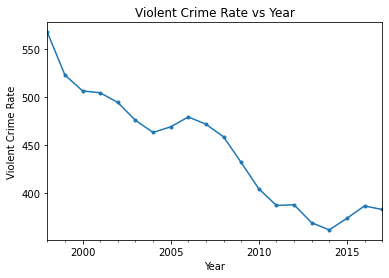

In [18]:
crime["Year"] = pd.to_datetime(crime["Year"].astype(str), format="%Y")

cr = crime.plot(x = 'Year',y = 'VCR', style = '.-',legend = None)
cr.set_ylabel('Violent Crime Rate')
cr.set_title('Violent Crime Rate vs Year')

### 1(b). Crime Rate vs Year vs Type of Violent Crime

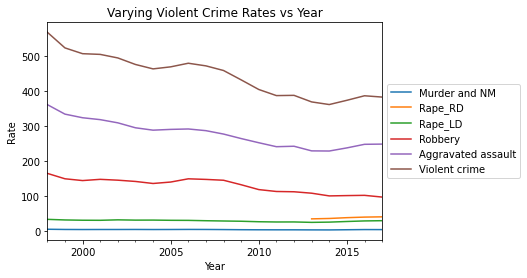

In [40]:
vc = crime.plot(x = 'Year',y = ['MNMR','RR_RD','RR_LD','RBR','AAR','VCR'])
vc.set_ylabel('Rate')
vc.set_title('Varying Violent Crime Rates vs Year') 
vc.legend(labels = ["Murder and NM", "Rape_RD", "Rape_LD","Robbery",
"Aggravated assault", "Violent crime"],loc = 'center left', bbox_to_anchor = (1, 0.5))

### 1(c). Property Crime Rate vs Year

Text(0.5, 1.0, 'Property Crime Rate vs Year')

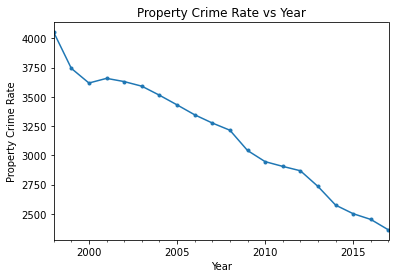

In [19]:
pcr = crime.plot(x = 'Year',y = 'PCR',style = '.-',legend = None)
pcr.set_ylabel('Property Crime Rate')
pcr.set_title('Property Crime Rate vs Year')

### 1(d). Crime Rate vs Year vs Type of Property Crime

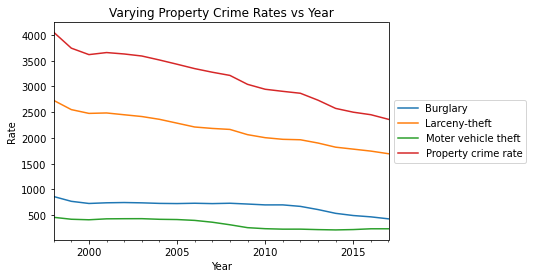

In [20]:
pc = crime.plot(x = 'Year',y = ['BGR','LTR','MVTR','PCR'])
pc.set_ylabel('Rate')
pc.set_title('Varying Property Crime Rates vs Year') 
pc.legend(labels = ["Burglary", "Larceny-theft",
"Moter vehicle theft","Property crime rate"],loc = 'center left', bbox_to_anchor = (1, 0.5))

## Load Student Information (2015_16) Data

In [25]:
score = pd.read_csv("/Users/wushuangyan/Projects/MERGED2015_16_PP.csv", 
                  na_values = [" ","NA","NULL","PrivacySuppressed"],
                  dtype = {'ZIP': 'str', 'T4APPROVALDATE': 'str','ALIAS':'str','NPCURL':'str'})

### 2(a). Student Percentage Distribution with Varying Family Income Ranges in All Institutions

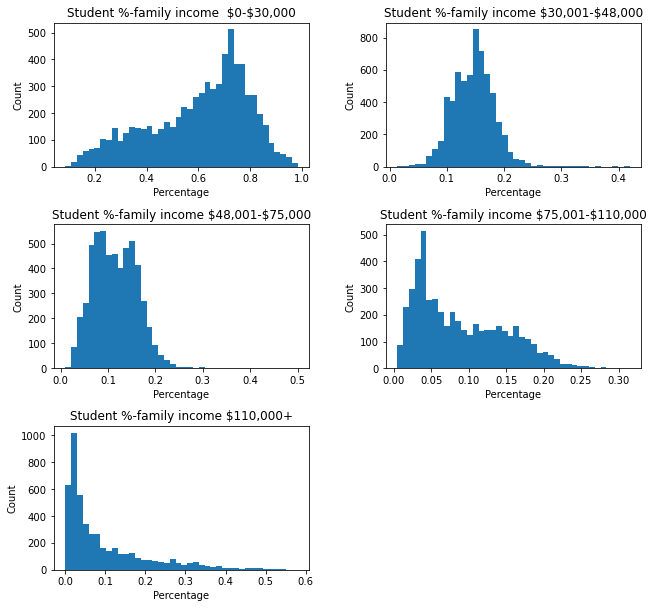

In [42]:
plt.figure(figsize = (8,8))
plt.subplot(321)
plt.hist(score.INC_PCT_LO,bins = 40)
plt.title("Student %-family income  \$0-\$30,000")
plt.xlabel("Percentage")
plt.ylabel("Count")

plt.subplot(322)
plt.hist(score.INC_PCT_M1,bins = 40)
plt.title("Student %-family income \$30,001-\$48,000")
plt.xlabel("Percentage")
plt.ylabel("Count")

plt.subplot(323)
plt.hist(score.INC_PCT_M2,bins = 40)
plt.title("Student %-family income \$48,001-\$75,000")
plt.xlabel("Percentage")
plt.ylabel("Count")

plt.subplot(324)
plt.hist(score.INC_PCT_H1,bins = 40)
plt.title("Student %-family income \$75,001-\$110,000")
plt.xlabel("Percentage")
plt.ylabel("Count")

plt.subplot(325)
plt.hist(score.INC_PCT_H2,bins = 40)
plt.title("Student %-family income \$110,000+")
plt.xlabel("Percentage")
plt.ylabel("Count")

plt.subplots_adjust(top = 1, bottom = 0.05, left = 0.08, 
                    right = 1.1, hspace = 0.4, wspace = 0.3)

### 2(b). Student Percentage vs Family Income Range vs Level of Institution

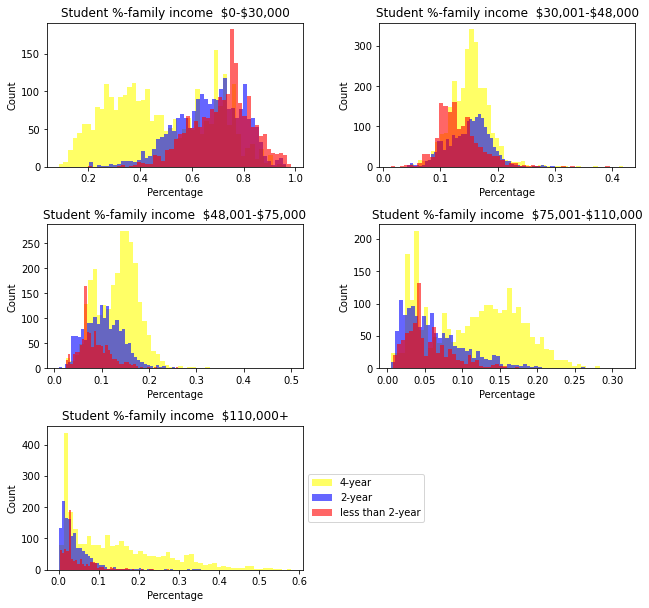

In [27]:
plt.figure(figsize = (8,8))
plt.subplot(321)
plt.hist(score.INC_PCT_LO[score.ICLEVEL==1],bins=50, color="yellow",label="4-year",alpha=0.6)
plt.hist(score.INC_PCT_LO[score.ICLEVEL==2],bins=50, color="blue",label="2-year",alpha=0.6)
plt.hist(score.INC_PCT_LO[score.ICLEVEL==3],bins=50, color="red",label="less than 2-year",alpha=0.6)
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title("Student %-family income  \$0-\$30,000")

plt.subplot(322)
plt.hist(score.INC_PCT_M1[score.ICLEVEL==1],bins=50, color="yellow",label="4-year",alpha=0.6)
plt.hist(score.INC_PCT_M1[score.ICLEVEL==2],bins=50, color="blue",label="2-year",alpha=0.6)
plt.hist(score.INC_PCT_M1[score.ICLEVEL==3],bins=50, color="red",label="less than 2-year",alpha=0.6)
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title("Student %-family income  \$30,001-\$48,000")

plt.subplot(323)
plt.hist(score.INC_PCT_M2[score.ICLEVEL==1],bins=50, color="yellow",label="4-year",alpha=0.6)
plt.hist(score.INC_PCT_M2[score.ICLEVEL==2],bins=50, color="blue",label="2-year",alpha=0.6)
plt.hist(score.INC_PCT_M2[score.ICLEVEL==3],bins=50, color="red",label="less than 2-year",alpha=0.6)
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title("Student %-family income  \$48,001-\$75,000")

plt.subplot(324)
plt.hist(score.INC_PCT_H1[score.ICLEVEL==1],bins=50, color="yellow",label="4-year",alpha=0.6)
plt.hist(score.INC_PCT_H1[score.ICLEVEL==2],bins=50, color="blue",label="2-year",alpha=0.6)
plt.hist(score.INC_PCT_H1[score.ICLEVEL==3],bins=50, color="red",label="less than 2-year",alpha=0.6)
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title("Student %-family income  \$75,001-\$110,000")
   
plt.subplot(325)
plt.hist(score.INC_PCT_H2[score.ICLEVEL==1],bins=50, color="yellow",label="4-year",alpha=0.6)
plt.hist(score.INC_PCT_H2[score.ICLEVEL==2],bins=50, color="blue",label="2-year",alpha=0.6)
plt.hist(score.INC_PCT_H2[score.ICLEVEL==3],bins=50, color="red",label="less than 2-year",alpha=0.6)
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title("Student %-family income  \$110,000+")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.subplots_adjust(top = 1, bottom = 0.05, left = 0.08, right = 1.1, hspace = 0.4,
                        wspace = 0.3)

### 2(c). Student Percentage vs Faculty Salary vs Level of Institution vs Family Income Range

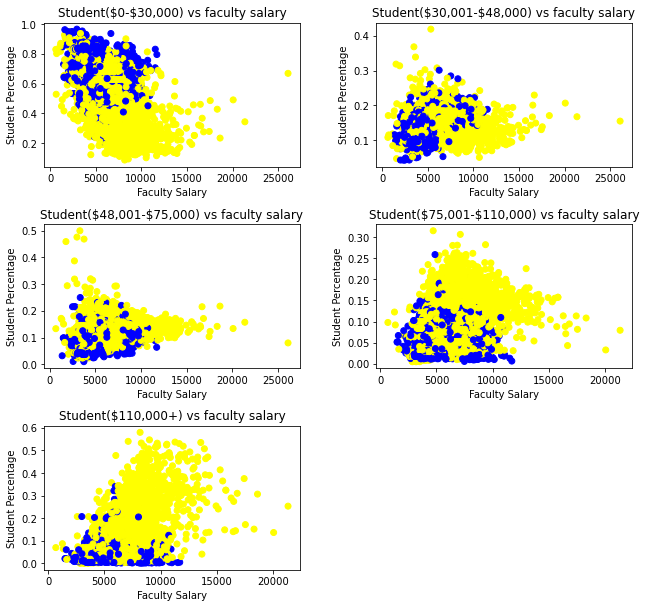

In [28]:
plt.figure(figsize = (8,8))
plt.subplot(321)
colors = pd.Series(["yellow", "blue", "red"]) 
plt.scatter(score.AVGFACSAL, score.INC_PCT_LO, c = colors[score.ICLEVEL-1])
plt.xlabel("Faculty Salary")
plt.ylabel("Student Percentage")
plt.title("Student(\$0-\$30,000) vs faculty salary")

plt.subplot(322)
colors = pd.Series(["yellow", "blue", "red"]) 
plt.scatter(score.AVGFACSAL, score.INC_PCT_M1, c = colors[score.ICLEVEL-1])
plt.xlabel("Faculty Salary")
plt.ylabel("Student Percentage")
plt.title("Student(\$30,001-\$48,000) vs faculty salary")

plt.subplot(323)
colors = pd.Series(["yellow", "blue", "red"]) 
plt.scatter(score.AVGFACSAL, score.INC_PCT_M2, c = colors[score.ICLEVEL-1])
plt.xlabel("Faculty Salary")
plt.ylabel("Student Percentage")
plt.title("Student(\$48,001-\$75,000) vs faculty salary")

plt.subplot(324)
colors = pd.Series(["yellow", "blue", "red"]) 
plt.scatter(score.AVGFACSAL, score.INC_PCT_H1, c = colors[score.ICLEVEL-1])
plt.xlabel("Faculty Salary")
plt.ylabel("Student Percentage")
plt.title("Student(\$75,001-\$110,000) vs faculty salary")

plt.subplot(325)
colors = pd.Series(["yellow", "blue", "red"]) 
plt.scatter(score.AVGFACSAL, score.INC_PCT_H2, c=colors[score.ICLEVEL-1])
plt.xlabel("Faculty Salary")
plt.ylabel("Student Percentage")
plt.title("Student(\$110,000+) vs faculty salary")
plt.subplots_adjust(top = 1, bottom = 0.05, left = 0.08, right = 1.1, hspace = 0.4,
                        wspace = 0.3)

## Load Student Information (2007_08) Data

In [43]:
score2 = pd.read_csv("/Users/wushuangyan/Projects/MERGED2007_08_PP.csv",
                      na_values = [" ","NA","NULL","PrivacySuppressed"],dtype = {'OPEID': 'str'})

### 3(a). Student Earning vs Admission Rate: 

Text(0.5, 1.0, 'Student Mean Earnings vs Admission Rate')

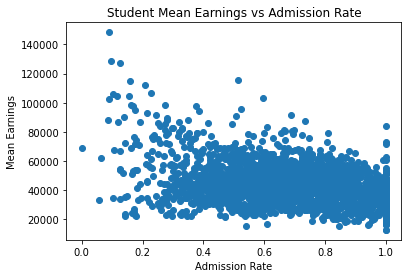

In [44]:
plt.scatter(score2.ADM_RATE, score2.MN_EARN_WNE_P10)
plt.xlabel("Admission Rate")
plt.ylabel("Mean Earnings")
plt.title("Student Mean Earnings vs Admission Rate")

### 3(b). Student Earning vs In-State Tuition:

Text(0.5, 1.0, 'Student Mean Earnings vs In-state Tuition')

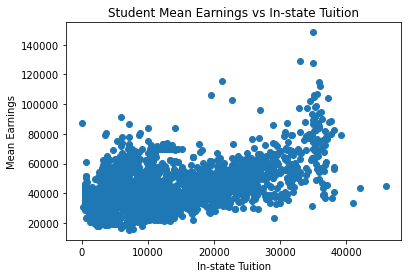

In [45]:
plt.scatter(score2.TUITIONFEE_IN, score2.MN_EARN_WNE_P10)
plt.xlabel("In-state Tuition")
plt.ylabel("Mean Earnings")
plt.title("Student Mean Earnings vs In-state Tuition")  

### 3(c). Student Earning vs SAT Score

Text(0.5, 1.0, 'Student Mean Earnings vs SAT Score')

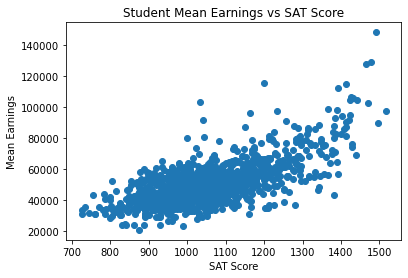

In [35]:
plt.scatter(score2.SAT_AVG, score2.MN_EARN_WNE_P10)
plt.xlabel("SAT Score")
plt.ylabel("Mean Earnings")
plt.title("Student Mean Earnings vs SAT Score")

### 3(d). Student Earning vs Region

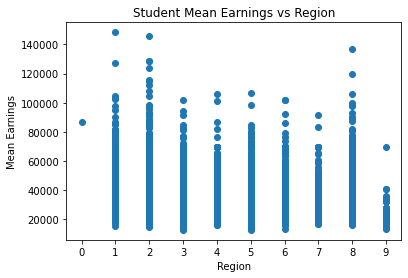

In [36]:
plt.scatter(score2.REGION, score2.MN_EARN_WNE_P10)
plt.xlabel("Region")
plt.ylabel("Mean Earnings")
plt.title("Student Mean Earnings vs Region") 
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

### 3(e). Student Earning vs Faculty Salary

Text(0.5, 1.0, 'Student Mean Earnings vs Faculty Salary')

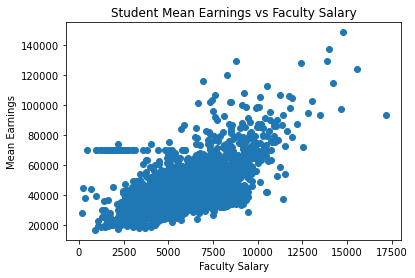

In [37]:
plt.scatter(score2.AVGFACSAL, score2.MN_EARN_WNE_P10)
plt.xlabel("Faculty Salary")
plt.ylabel("Mean Earnings")
plt.title("Student Mean Earnings vs Faculty Salary") 

### 3(f). Mean Males Earnings vs Mean Female Earnings at All Institutions

Text(0.5, 1.0, 'Male vs Female Student Earnings')

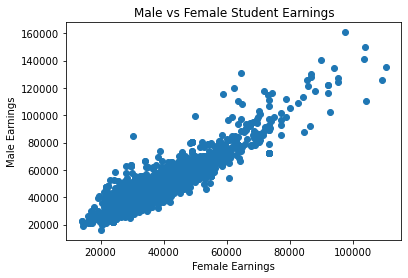

In [38]:
plt.scatter(score2.MN_EARN_WNE_MALE0_P10, score2.MN_EARN_WNE_MALE1_P10)
plt.xlabel("Female Earnings")
plt.ylabel("Male Earnings")
plt.title("Male vs Female Student Earnings") 